In [2]:
import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk
import operator

In [326]:
updates_per_project = dict()

#Projects to remove 777, 1921 (whole canvas), 1240, 1516 (1 pixel), 1319 (very incomplete)
projects_to_remove = {'777', '1921', '1240', '1516', '1319'}

with open("updates_per_project.csv",'r') as file:
    # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        if r[0] not in projects_to_remove:
            updates_per_project[r[0]] = int(r[-1])

In [327]:
count = np.zeros(max(updates_per_project.values())+1)

for k in updates_per_project:
    count[updates_per_project[k]] = count[updates_per_project[k]] + 1
    
for i in reversed(range(len(count)-1)):
    count[i] = count[i] + count[i+1]
    
count = count / count[0]

In [328]:
sorted_up_proj = sorted(updates_per_project.items(), key=operator.itemgetter(1), reverse=True)

In [329]:
#Top-10

sorted_up_proj[0:10]

[('286', 1078220),
 ('1122', 684179),
 ('42', 612816),
 ('1169', 587958),
 ('95', 540508),
 ('1692', 438387),
 ('736', 402175),
 ('1066', 362651),
 ('67', 358566),
 ('903', 353109)]

In [330]:
#Bottom-10

sorted_up_proj[-10:]

[('1594', 93),
 ('862', 86),
 ('1276', 82),
 ('645', 82),
 ('1520', 82),
 ('1408', 75),
 ('1419', 66),
 ('1801', 61),
 ('1823', 55),
 ('1824', 3)]

In [331]:
#AVG

print("AVG = ", np.mean(np.array(list(updates_per_project.values()))))

AVG =  15923.549868073878


In [332]:
#STD

print("STD = ", np.std(np.array(list(updates_per_project.values()))))

STD =  52332.93157519816


In [158]:
sorted_up_proj_vals = []

for p in sorted_up_proj:
    sorted_up_proj_vals.append(p[1])

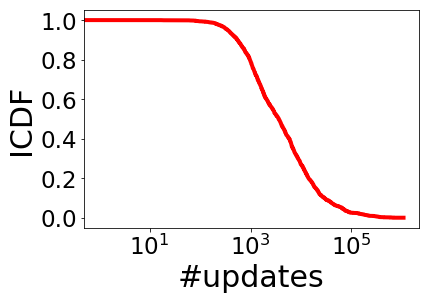

In [282]:
def plot_updates_per_project_icdf(count, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    ax.semilogx(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#updates', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_yticks(np.arange(0, 1.1, .2))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_per_project_icdf(count, "plot_updates_per_project_icdf.svg")

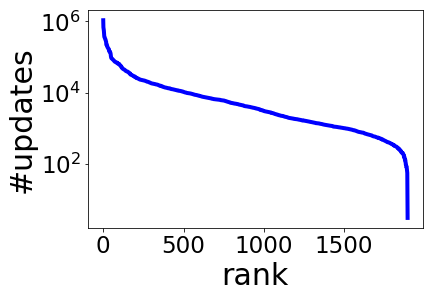

In [283]:
def plot_updates_per_project_rank(sorted_up_proj, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    ax.semilogy(np.arange(len(sorted_up_proj)), sorted_up_proj, color="blue", linewidth=4)
    ax.set_ylabel('#updates', fontsize=30)
    ax.set_xlabel('rank', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0, len(sorted_up_proj), 500))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_per_project_rank(sorted_up_proj_vals, "plot_updates_per_project_rank.svg")

In [162]:
# Color Entropy
# This is a discrete distribution but should probably be continuous (?)
entropy_per_project = {}

#Projects to remove 777, 1921 (whole canvas), 1240, 1516 (1 pixel), 1319 (very incomplete)
projects_to_remove = {'777', '1921', '1240', '1516', '1319'}

with open("color_per_picture_entropy.csv", 'r') as file:
    # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        if r[1] != 'NA' and r[0] not in projects_to_remove:
            entropy_per_project[r[0]] = float(r[1])

In [294]:
entropy = sorted(list(entropy_per_project.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

In [164]:
sorted_ent_proj = sorted(entropy_per_project.items(), key=operator.itemgetter(1), reverse=True)

In [165]:
sorted_ent_proj_vals = []

for p in sorted_ent_proj:
    sorted_ent_proj_vals.append(p[1])

In [295]:
#Top-10

sorted_ent_proj[0:10]

[('692', 2.62879857641316),
 ('1192', 2.626443010876863),
 ('360', 2.6200140250781163),
 ('936', 2.579472788144371),
 ('656', 2.562170079369621),
 ('1751', 2.5608575975838828),
 ('58', 2.549149847713903),
 ('966', 2.5323233365881452),
 ('575', 2.5283521870713326),
 ('1697', 2.5211085651116036)]

In [296]:
#Bottom-10

sorted_ent_proj[-10:]

[('1104', 1.0765558106170405),
 ('1161', 1.0363826208388036),
 ('1331', 1.032907216173823),
 ('1177', 1.018259757368317),
 ('1791', 1.0174379097233763),
 ('856', 1.010740482668805),
 ('1112', 0.9898549174012896),
 ('1097', 0.962231222075264),
 ('1512', 0.7545123567706904),
 ('1383', 0.6928361704898555)]

In [297]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_project.values()))))

AVG =  1.9623706536463532


In [298]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_project.values()))))

STD =  0.27767413990160245


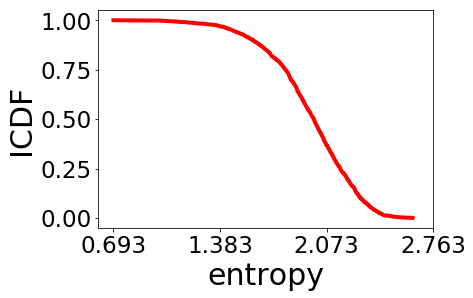

In [299]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(entropy[0],math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_color_entropies_per_project_icdf(entropy, count, "plot_color_entropies_icdf.svg")

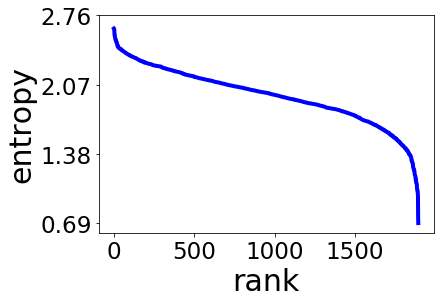

In [300]:
%matplotlib inline
def plot_color_entropies_per_project_rank(sorted_ent_proj, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(sorted_ent_proj, color="blue", linewidth=4)
    ax.set_ylabel('entropy', fontsize=30)
    ax.set_xlabel('rank', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_yticks(np.arange(.69,math.exp(1)+.1, .69))
    ax.set_xticks(np.arange(0, len(sorted_ent_proj), 500))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_color_entropies_per_project_rank(sorted_ent_proj_vals, "plot_color_entropies_rank.svg")

In [173]:
# Pixels per Project
pixels_per_project = {}

#Projects to remove 777, 1921 (whole canvas), 1240, 1516 (1 pixel), 1319 (very incomplete)
projects_to_remove = {'777', '1921', '1240', '1516', '1319'}

with open("pixels_per_project.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        if r[0] not in projects_to_remove:
            pixels_per_project[r[0]] = int(r[1])

In [174]:
pixels = sorted(list(pixels_per_project.values()))

count = np.arange(len(pixels)+1)[len(pixels)+1:0:-1]
count = count / count[0]

In [175]:
sorted_pixels_proj = sorted(pixels_per_project.items(), key=operator.itemgetter(1), reverse=True)

In [176]:
sorted_pixels_proj_vals = []

for p in sorted_pixels_proj:
    sorted_pixels_proj_vals.append(p[1])

In [301]:
#Top-10

sorted_pixels_proj[0:10]

[('286', 87255),
 ('1692', 32920),
 ('998', 22926),
 ('75', 21406),
 ('1870', 21401),
 ('61', 18669),
 ('46', 18075),
 ('360', 17707),
 ('2', 15072),
 ('903', 14281)]

In [302]:
#Bottom-10

sorted_pixels_proj[-10:]

[('1533', 10),
 ('1592', 10),
 ('1640', 9),
 ('1801', 9),
 ('645', 8),
 ('1823', 5),
 ('1493', 4),
 ('1383', 2),
 ('1319', 1),
 ('1824', 1)]

In [303]:
#AVG

print("AVG = ", np.mean(np.array(list(pixels_per_project.values()))))

AVG =  890.4287974683544


In [304]:
#STD

print("STD = ", np.std(np.array(list(pixels_per_project.values()))))

STD =  2841.8597292386894


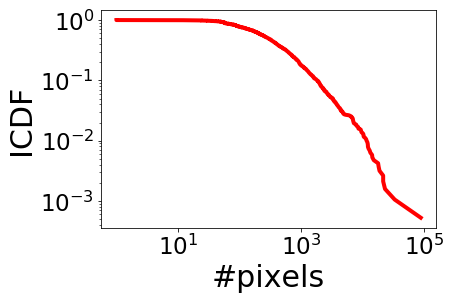

In [306]:
%matplotlib inline
def plot_pixels_per_project_icdf(pixels, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(pixels, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(entropy[0],math.exp(1)+.1, .69))
    #ax.set_yticks(np.arange(0, 1.1, .2))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_per_project_icdf(pixels, count, "plot_pixels_icdf.svg")

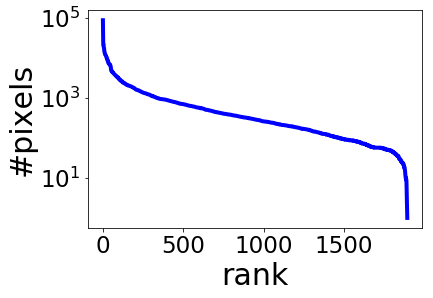

In [307]:
%matplotlib inline
def plot_pixels_per_project_rank(sorted_pixels_proj, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.semilogy(sorted_pixels_proj, color="blue", linewidth=4)
    ax.set_ylabel('#pixels', fontsize=30)
    ax.set_xlabel('rank', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0, len(sorted_ent_proj), 500))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_per_project_rank(sorted_pixels_proj_vals, "plot_pixels_rank.svg")

In [187]:
projects_per_user = {}

#Projects to remove 777, 1921 (whole canvas), 1240, 1516 (1 pixel), 1319 (very incomplete)
projects_to_remove = {'777', '1921', '1240', '1516', '1319'}

with open("projects_per_user.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        str_proj = r[1][2:-2]
        lst_proj = str_proj.split(',')
        
        projects_per_user[r[0]] = 0
        
        for p in lst_proj:
            if p not in projects_to_remove:
                projects_per_user[r[0]] = projects_per_user[r[0]] + 1

In [313]:
proj_user = sorted(list(projects_per_user.values()))

count = np.arange(len(proj_user)+1)[len(proj_user)+1:0:-1]
count = count / count[0]

In [189]:
sorted_proj_user = sorted(projects_per_user.items(), key=operator.itemgetter(1), reverse=True)

In [190]:
sorted_proj_user_vals = []

for p in sorted_proj_user:
    sorted_proj_user_vals.append(p[1])

In [308]:
#Top-10

sorted_proj_user[0:10]

[('oV/QBQVpRBPm5K4UoK73KXfcG0o=', 352),
 ('yluQzhGix6Kb3RuJ1OyUUTxskhQ=', 330),
 ('OsnDa+2E+woJy7TN3U87yLQrbu8=', 325),
 ('8xow27kDaned3b13ENiuQT9fmRE=', 307),
 ('ZSPEY69+JkkBBY/a3gb/jUvXIgA=', 298),
 ('6AV6Kp/ChSlyKzHwgDGkWEScUJM=', 246),
 ('gIIoT+oPbML64+byH2Ms6FIj1sM=', 237),
 ('lnmjEGEWgq+s9joisWlkVYoEaUA=', 226),
 ('CeS6AznWDvF1LY9EIwB6ejhUCHM=', 192),
 ('lkQQqlMgmDd++vZn92bq65h8Teo=', 188)]

In [309]:
#Bottom-10

sorted_proj_user[-10:]

[('1z6NesrdQL+4m0rSQ2lS819GuxQ=', 1),
 ('juJM6hFOzY8R+DlNbtcrHh7KhJw=', 1),
 ('goLKZy/GA7PHVNNKT73JsTqxHp0=', 1),
 ('vyf5Xy7+nkf4ufzQ9wmu+2cxkaM=', 1),
 ('fuifxwogs4tD3vflBPq458V6SNQ=', 1),
 ('gcZZ6P2eEo1QJ5pqTZJoNjAW81A=', 1),
 ('Q4k7cdcbFf2xOrLyun0nqjFg5/U=', 1),
 ('aiq2IR1mg9cyogrEwv6m7DG9Wl4=', 1),
 ('ewkwRrQUfFwNj4k3UowcLZiG5LQ=', 1),
 ('65klnVPpsifHGq9Sxv9j/VagWK4=', 1)]

In [310]:
#AVG

print("AVG = ", np.mean(np.array(list(projects_per_user.values()))))

AVG =  9.229389403251625


In [311]:
#STD

print("STD = ", np.std(np.array(list(projects_per_user.values()))))

STD =  8.541646649948019


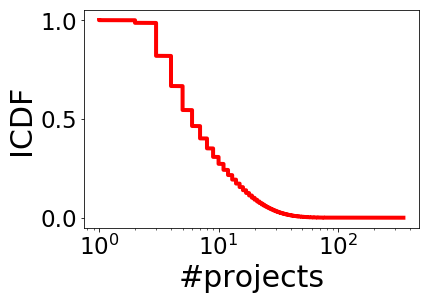

In [314]:
%matplotlib inline
def plot_projects_per_user_icdf(proj_user, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.semilogx(proj_user, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#projects', fontsize=30)
    ax.tick_params(labelsize=23)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_projects_per_user_icdf(proj_user, count, "plot_proj_user_icdf.svg")

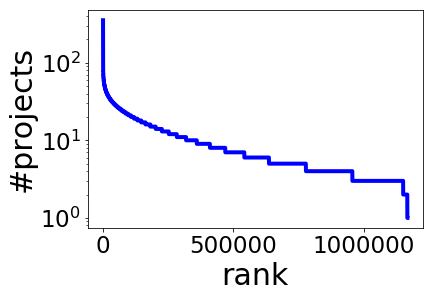

In [315]:
%matplotlib inline

def plot_projects_per_user_rank(sorted_proj_user, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.semilogy(sorted_proj_user, color="blue", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('rank', fontsize=30)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_projects_per_user_rank(sorted_proj_user_vals, "plot_proj_user_rank.svg")

In [226]:
# Users per Project
users_per_project = {}

#Projects to remove 777, 1921 (whole canvas), 1240, 1516 (1 pixel), 1319 (very incomplete)
projects_to_remove = {'777', '1921', '1240', '1516', '1319'}

with open("users_per_project.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        if r[0] not in projects_to_remove:
            users_per_project[r[0]] = int(r[1])

In [321]:
user_proj = sorted(list(users_per_project.values()))

count = np.arange(len(user_proj)+1)[len(user_proj)+1:0:-1]
count = count / count[0]

In [228]:
sorted_user_proj = sorted(users_per_project.items(), key=operator.itemgetter(1), reverse=True)

In [229]:
sorted_user_proj_vals = []

for p in sorted_user_proj:
    sorted_user_proj_vals.append(p[1])

In [316]:
#Top-10

sorted_user_proj[:10]

[('286', 266766),
 ('1122', 158121),
 ('42', 151978),
 ('1169', 150274),
 ('95', 107561),
 ('1066', 106865),
 ('67', 105913),
 ('998', 93146),
 ('1870', 89266),
 ('56', 88997)]

In [317]:
#Bottom-10

sorted_user_proj[-10:]

[('1681', 44),
 ('1110', 43),
 ('1401', 41),
 ('1823', 38),
 ('1592', 35),
 ('1408', 32),
 ('1419', 26),
 ('1520', 25),
 ('1319', 17),
 ('1824', 3)]

In [318]:
#AVG

print("AVG = ", np.mean(np.array(list(users_per_project.values()))))

AVG =  4449.984704641351


In [319]:
#STD

print("STD = ", np.std(np.array(list(users_per_project.values()))))

STD =  12923.25483534713


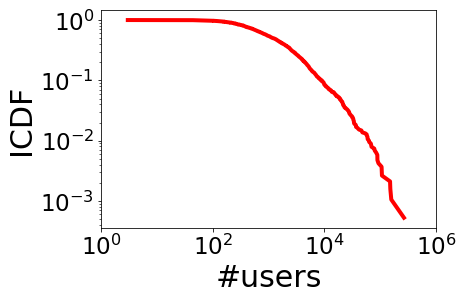

In [322]:
%matplotlib inline
def plot_users_per_project_icdf(user_proj, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(user_proj, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1, 1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_per_project_icdf(user_proj, count, "plot_user_proj_icdf.svg")

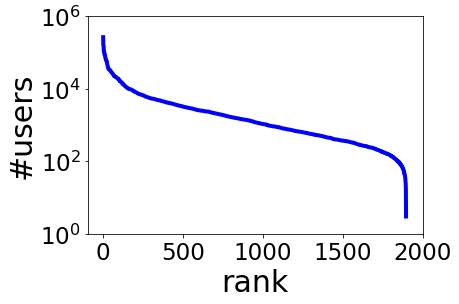

In [323]:
def plot_users_per_project_rank(sorted_user_proj, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.semilogy(sorted_user_proj, color="blue", linewidth=4)
    ax.set_ylabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('rank', fontsize=30)
    ax.set_xticks(np.arange(0, 2001, 500))
    ax.set_ylim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_per_project_rank(sorted_user_proj_vals, "plot_user_proj_rank.svg")

In [333]:
# Time
times_per_project = {}

#Projects to remove 777, 1921 (whole canvas), 1240, 1516 (1 pixel), 1319 (very incomplete)
projects_to_remove = {'777', '1921', '1240', '1516', '1319'}

with open("times_per_project.csv", 'r') as file:
     # Skip first line (header row)
    next(file, None)
    reader = csv.reader(file)
    for r in reader:
        if r[3] != 'NA' and r[0] not in projects_to_remove:
            times_per_project[r[0]] = int(r[3])

In [334]:
time_proj = sorted(list(times_per_project.values()))

count = np.arange(len(time_proj)+1)[len(time_proj)+1:0:-1]
count = count / count[0]

In [335]:
sorted_time_proj = sorted(times_per_project.items(), key=operator.itemgetter(1), reverse=True)

In [337]:
sorted_time_proj_vals = []

for p in sorted_time_proj:
    sorted_time_proj_vals.append(p[1])

In [338]:
#Top-10

sorted_time_proj[:10]

[('230', 304153000),
 ('2', 259159000),
 ('1031', 259111000),
 ('1062', 259111000),
 ('1259', 258812000),
 ('118', 258812000),
 ('286', 258572000),
 ('357', 258564000),
 ('206', 258517000),
 ('1038', 258499000)]

In [339]:
#Bottom-10

sorted_time_proj[-10:]

[('1640', 7676000),
 ('1298', 6835000),
 ('1575', 5374000),
 ('1736', 5142000),
 ('1341', 4596000),
 ('1096', 3008000),
 ('1823', 2390000),
 ('1493', 1835000),
 ('1383', 1105000),
 ('1824', 0)]

In [344]:
#AVG

print("AVG = ", np.mean(np.array(list(times_per_project.values())))/(1000 * 60 * 60))

AVG =  53.34995411902668


In [345]:
#STD

print("STD = ", np.std(np.array(list(times_per_project.values())))/(1000 * 60 * 60))

STD =  18.76175419445967


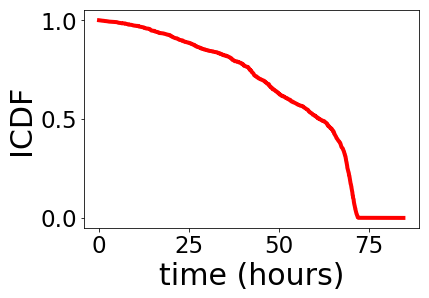

In [340]:
%matplotlib inline
def plot_times_per_project_icdf(time_proj, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(np.array(time_proj)/(1000*60*60), count, color="red", linewidth=4) #millisecons to hours
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xlim(1, 1000000)
    #ax.set_xticks(np.arange(entropy[0],math.exp(1)+.1, .69))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_times_per_project_icdf(time_proj, count, "plot_time_proj_icdf.svg")

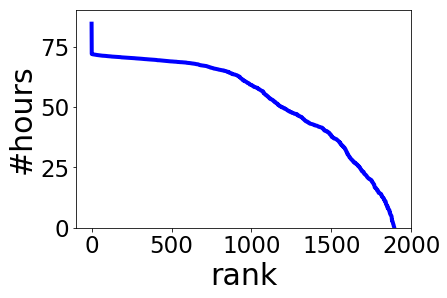

In [341]:
def plot_times_per_project_rank(sorted_time_proj, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(np.array(sorted_time_proj)/(1000*60*60), color="blue", linewidth=4)
    ax.set_ylabel('#hours', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('rank', fontsize=30)
    ax.set_xticks(np.arange(0, 2001, 500))
    ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_times_per_project_rank(sorted_time_proj_vals, "plot_time_proj_rank.svg")

In [364]:
#Updates vs. entropy per project

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    up = updates_per_project[p]
    ent = entropy_per_project[p]
    
    X[i] = up
    Y[i] = ent
    
    ratios[p] = ent / up
    
    i = i + 1

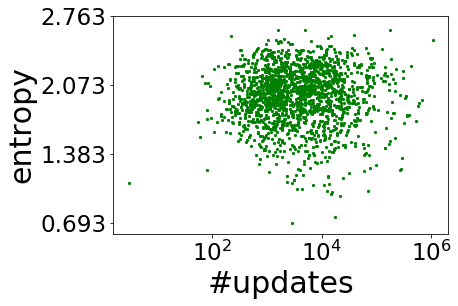

In [353]:
def plot_updates_vs_entropy(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_entropy(X, Y, "plot_updates_vs_entropy.svg")

In [356]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.01240211],
       [-0.01240211,  1.        ]])

In [371]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [369]:
#Entropy/update

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    ent = entropy_per_project[p]
    up = updates_per_project[p]
    
    print("project: ", p, "entropy: ", ent, " updates: ", up, " entropy/update: ", r)

project:  1824 entropy:  1.0986122886681096  updates:  3  entropy/update:  0.36620409622270317
project:  1419 entropy:  2.1679025503594818  updates:  66  entropy/update:  0.03284700833878003
project:  1823 entropy:  1.7075036453641854  updates:  55  entropy/update:  0.03104552082480337
project:  1408 entropy:  2.0908155810619586  updates:  75  entropy/update:  0.027877541080826115
project:  1801 entropy:  1.5603830291635967  updates:  61  entropy/update:  0.025580049658419618
project:  862 entropy:  2.0936386996190697  updates:  86  entropy/update:  0.024344636042082205
project:  1594 entropy:  2.0696308128546264  updates:  93  entropy/update:  0.022254094761877702
project:  1520 entropy:  1.8216729838184715  updates:  82  entropy/update:  0.02221552419290819
project:  645 entropy:  1.730507493951123  updates:  82  entropy/update:  0.021103749926233206
project:  1592 entropy:  2.23330011555482  updates:  110  entropy/update:  0.02030272832322564


In [375]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    ent = entropy_per_project[p]
    up = updates_per_project[p]
    
    print("project: ", p, "entropy: ", ent, " updates: ", up, " entropy/update: ", r)

project:  286 entropy:  2.5201075806834554  updates:  1078220  entropy/update:  2.337285137247923e-06
project:  1122 entropy:  1.9258022777284207  updates:  684179  entropy/update:  2.814763793873271e-06
project:  42 entropy:  1.8934406184632742  updates:  612816  entropy/update:  3.089737569618408e-06
project:  1169 entropy:  1.8637929076111952  updates:  587958  entropy/update:  3.169942253717434e-06
project:  95 entropy:  1.7155538740639518  updates:  540508  entropy/update:  3.1739657397558443e-06
project:  736 entropy:  1.7740802374969358  updates:  402175  entropy/update:  4.411214614277207e-06
project:  75 entropy:  1.2235034441598396  updates:  274444  entropy/update:  4.458116935184736e-06
project:  1870 entropy:  1.238122435906646  updates:  276461  entropy/update:  4.478470510873672e-06
project:  998 entropy:  1.3441048998717267  updates:  293808  entropy/update:  4.574772980557802e-06
project:  1066 entropy:  1.7716695512363754  updates:  362651  entropy/update:  4.88532928

In [376]:
#Updates vs. pixels per project

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    up = updates_per_project[p]
    pix = pixels_per_project[p]
    
    X[i] = up
    Y[i] = pix
    
    ratios[p] = pix / up
    
    i = i + 1

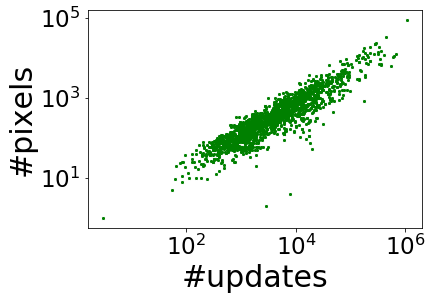

In [360]:
def plot_updates_vs_pixels(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_pixels(X, Y, "plot_updates_vs_pixels.svg")

In [359]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.84277543],
       [0.84277543, 1.        ]])

In [377]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [380]:
#Pixels/update

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    pix = pixels_per_project[p]
    up = updates_per_project[p]
    
    print("project: ", p, "pixels: ", pix, " updates: ", up, " pixels/update: ", r)

project:  188 pixels:  336  updates:  821  pixels/update:  0.4092570036540804
project:  1110 pixels:  65  updates:  167  pixels/update:  0.38922155688622756
project:  1594 pixels:  36  updates:  93  pixels/update:  0.3870967741935484
project:  1170 pixels:  77  updates:  203  pixels/update:  0.3793103448275862
project:  932 pixels:  326  updates:  931  pixels/update:  0.3501611170784103
project:  667 pixels:  206  updates:  616  pixels/update:  0.3344155844155844
project:  1824 pixels:  1  updates:  3  pixels/update:  0.3333333333333333
project:  972 pixels:  66  updates:  204  pixels/update:  0.3235294117647059
project:  1417 pixels:  48  updates:  150  pixels/update:  0.32
project:  1401 pixels:  40  updates:  127  pixels/update:  0.31496062992125984


In [381]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    pix = pixels_per_project[p]
    up = updates_per_project[p]
    
    print("project: ", p, "pixels: ", pix, " updates: ", up, " pixels/update: ", r)

project:  1493 pixels:  4  updates:  7701  pixels/update:  0.0005194130632385404
project:  1383 pixels:  2  updates:  2872  pixels/update:  0.0006963788300835655
project:  549 pixels:  51  updates:  19655  pixels/update:  0.0025947596031544134
project:  1512 pixels:  72  updates:  17723  pixels/update:  0.004062517632455002
project:  390 pixels:  818  updates:  171275  pixels/update:  0.004775945117501095
project:  1112 pixels:  91  updates:  15123  pixels/update:  0.006017324604906434
project:  1855 pixels:  108  updates:  17449  pixels/update:  0.006189466445068485
project:  1812 pixels:  108  updates:  17449  pixels/update:  0.006189466445068485
project:  757 pixels:  224  updates:  31545  pixels/update:  0.007100966872721509
project:  62 pixels:  104  updates:  12098  pixels/update:  0.008596462225161184


In [401]:
#Updates vs. users per project

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    up = updates_per_project[p]
    usr = users_per_project[p]
    
    X[i] = up
    Y[i] = usr
    
    ratios[p] = usr / up
    
    i = i + 1

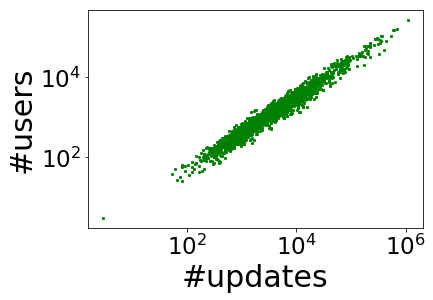

In [383]:
def plot_updates_vs_users(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_users(X, Y, "plot_updates_vs_users.svg")

In [384]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.97486716],
       [0.97486716, 1.        ]])

In [402]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [403]:
#Users/update

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    usr = users_per_project[p]
    up = updates_per_project[p]
    
    print("project: ", p, "users: ", usr, " updates: ", up, " users/update: ", r)

project:  1824 users:  3  updates:  3  users/update:  1.0
project:  1876 users:  1295  updates:  1486  users/update:  0.8714670255720054
project:  1923 users:  1404  updates:  1669  users/update:  0.8412222887956861
project:  1670 users:  1477  updates:  1768  users/update:  0.8354072398190046
project:  1687 users:  645  updates:  780  users/update:  0.8269230769230769
project:  1762 users:  1533  updates:  1854  users/update:  0.8268608414239482
project:  1801 users:  49  updates:  61  users/update:  0.8032786885245902
project:  1441 users:  569  updates:  746  users/update:  0.7627345844504021
project:  551 users:  449  updates:  591  users/update:  0.7597292724196277
project:  645 users:  61  updates:  82  users/update:  0.7439024390243902


In [404]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    usr = users_per_project[p]
    up = updates_per_project[p]
    
    print("project: ", p, "users: ", usr, " updates: ", up, " users/update: ", r)

project:  402 users:  1759  updates:  15686  users/update:  0.11213821241871733
project:  1757 users:  36757  updates:  324259  users/update:  0.11335691530535776
project:  736 users:  47034  updates:  402175  users/update:  0.1169490893267856
project:  390 users:  20180  updates:  171275  users/update:  0.11782221573492921
project:  457 users:  1367  updates:  11582  users/update:  0.11802797444310137
project:  307 users:  1365  updates:  11442  users/update:  0.11929732564237021
project:  1281 users:  1766  updates:  13125  users/update:  0.13455238095238095
project:  78 users:  1764  updates:  13090  users/update:  0.13475935828877006
project:  520 users:  3120  updates:  23009  users/update:  0.13559911339041245
project:  207 users:  2891  updates:  21059  users/update:  0.137280972505817


In [405]:
#Updates vs. time

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    up = updates_per_project[p]
    t = times_per_project[p] / (1000 * 60 * 60)
    
    X[i] = up
    Y[i] = t
    
    ratios[p] = t / up
    
    i = i + 1

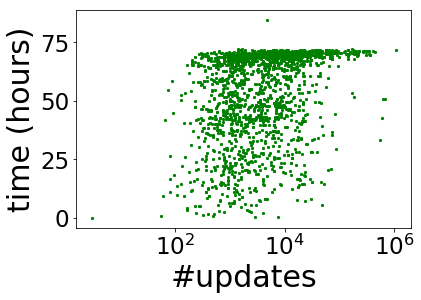

In [392]:
def plot_updates_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    #ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_times(X, Y, "plot_updates_vs_times.svg")

In [390]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.13952994],
       [0.13952994, 1.        ]])

In [406]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [407]:
#Time/update

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    t = times_per_project[p]
    up = updates_per_project[p]
    
    print("project: ", p, "time: ", t, " updates: ", up, " time/update: ", r)

project:  1408 time:  196881000  updates:  75  time/update:  0.7291888888888889
project:  862 time:  209834000  updates:  86  time/update:  0.6777583979328164
project:  1419 time:  150197000  updates:  66  time/update:  0.6321422558922559
project:  1594 time:  161279000  updates:  93  time/update:  0.48171744324970134
project:  592 time:  188445000  updates:  127  time/update:  0.4121719160104987
project:  1401 time:  180923000  updates:  127  time/update:  0.39571959755030617
project:  1110 time:  234290000  updates:  167  time/update:  0.38970392548236854
project:  1417 time:  191779000  updates:  150  time/update:  0.3551462962962963
project:  183 time:  222337000  updates:  178  time/update:  0.3469678526841448
project:  1584 time:  242446000  updates:  204  time/update:  0.3301279956427015


In [408]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    t = times_per_project[p]
    up = updates_per_project[p]
    
    print("project: ", p, "time: ", t, " updates: ", up, " time/update: ", r)

project:  1824 time:  0  updates:  3  time/update:  0.0
project:  95 time:  119708000  updates:  540508  time/update:  6.152031463405208e-05
project:  1493 time:  1835000  updates:  7701  time/update:  6.618909521130012e-05
project:  286 time:  258572000  updates:  1078220  time/update:  6.661493531520057e-05
project:  1169 time:  153705000  updates:  587958  time/update:  7.261714839041791e-05
project:  1122 time:  182755000  updates:  684179  time/update:  7.419882483645037e-05
project:  42 time:  182755000  updates:  612816  time/update:  8.283934782671761e-05
project:  1383 time:  1105000  updates:  2872  time/update:  0.0001068748065614361
project:  1100 time:  18906000  updates:  47951  time/update:  0.00010952152544611514
project:  1692 time:  255648000  updates:  438387  time/update:  0.00016198777183934135


In [409]:
#Pixels vs. entropy per project

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    ent = entropy_per_project[p]
    pix = pixels_per_project[p]
    
    Y[i] = ent
    X[i] = pix
    
    ratios[p] = ent / pix
    
    i = i + 1

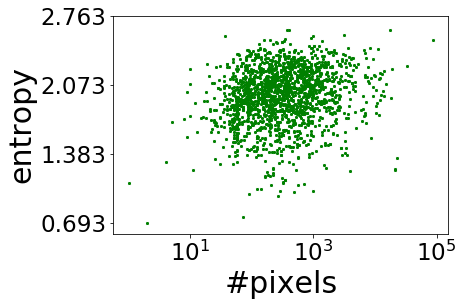

In [398]:
def plot_pixels_vs_entropy(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    ax.set_xscale('log')
    #ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_entropy(X, Y, "plot_pixels_vs_entropy.svg")

In [399]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.07472808],
       [0.07472808, 1.        ]])

In [410]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [411]:
#Entropy/pixel

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    ent = entropy_per_project[p]
    pix = pixels_per_project[p]
    
    print("project: ", p, "entropy: ", ent, " pixels: ", pix, " entropy/pixel: ", r)

project:  1824 entropy:  1.0986122886681096  pixels:  1  entropy/pixel:  1.0986122886681096
project:  1383 entropy:  0.6928361704898555  pixels:  2  entropy/pixel:  0.34641808524492773
project:  1823 entropy:  1.7075036453641854  pixels:  5  entropy/pixel:  0.3415007290728371
project:  1493 entropy:  1.302178642906814  pixels:  4  entropy/pixel:  0.3255446607267035
project:  1592 entropy:  2.23330011555482  pixels:  10  entropy/pixel:  0.22333001155548202
project:  1640 entropy:  2.0004720210020785  pixels:  9  entropy/pixel:  0.22227466900023096
project:  645 entropy:  1.730507493951123  pixels:  8  entropy/pixel:  0.21631343674389036
project:  546 entropy:  2.083208419528378  pixels:  10  entropy/pixel:  0.20832084195283782
project:  1533 entropy:  1.7629908150784088  pixels:  10  entropy/pixel:  0.17629908150784088
project:  1801 entropy:  1.5603830291635967  pixels:  9  entropy/pixel:  0.17337589212928853


In [412]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    ent = entropy_per_project[p]
    pix = pixels_per_project[p]
    
    print("project: ", p, "entropy: ", ent, " pixels: ", pix, " entropy/pixel: ", r)

project:  286 entropy:  2.5201075806834554  pixels:  87255  entropy/pixel:  2.888209937176615e-05
project:  75 entropy:  1.2235034441598396  pixels:  21406  entropy/pixel:  5.7157032802010635e-05
project:  1870 entropy:  1.238122435906646  pixels:  21401  entropy/pixel:  5.7853485159882534e-05
project:  998 entropy:  1.3441048998717267  pixels:  22926  entropy/pixel:  5.8627972601924745e-05
project:  1692 entropy:  2.2625207668214995  pixels:  32920  entropy/pixel:  6.872784832386086e-05
project:  46 entropy:  1.941622358069075  pixels:  18075  entropy/pixel:  0.00010742032409787413
project:  61 entropy:  2.2385399705223628  pixels:  18669  entropy/pixel:  0.00011990679578565337
project:  903 entropy:  1.9671090653257879  pixels:  14281  entropy/pixel:  0.00013774308979243666
project:  2 entropy:  2.0846681989872113  pixels:  15072  entropy/pixel:  0.0001383139728627396
project:  360 entropy:  2.6200140250781163  pixels:  17707  entropy/pixel:  0.0001479648740655174


In [413]:
#Pixels vs. users per project

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    usr = users_per_project[p]
    pix = pixels_per_project[p]
    
    Y[i] = usr
    X[i] = pix
    
    ratios[p] = usr / pix
    
    i = i + 1

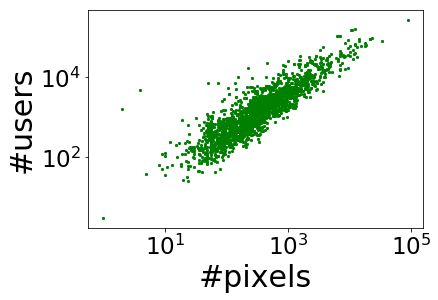

In [414]:
def plot_pixels_vs_users(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_users(X, Y, "plot_pixels_vs_users.svg")

In [415]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.84457543],
       [0.84457543, 1.        ]])

In [416]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [417]:
#Users/pixel

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    usr = users_per_project[p]
    pix = pixels_per_project[p]
    
    print("project: ", p, "users: ", usr, " pixels: ", pix, " usr/pixel: ", r)

project:  1493 users:  4849  pixels:  4  usr/pixel:  1212.25
project:  1383 users:  1589  pixels:  2  usr/pixel:  794.5
project:  549 users:  7072  pixels:  51  usr/pixel:  138.66666666666666
project:  1512 users:  6895  pixels:  72  usr/pixel:  95.76388888888889
project:  757 users:  16713  pixels:  224  usr/pixel:  74.61160714285714
project:  142 users:  9888  pixels:  151  usr/pixel:  65.48344370860927
project:  62 users:  5344  pixels:  104  usr/pixel:  51.38461538461539
project:  527 users:  6885  pixels:  135  usr/pixel:  51.0
project:  1100 users:  22847  pixels:  448  usr/pixel:  50.997767857142854
project:  830 users:  839  pixels:  19  usr/pixel:  44.1578947368421


In [418]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    usr = users_per_project[p]
    pix = pixels_per_project[p]
    
    print("project: ", p, "users: ", usr, " pixels: ", pix, " usr/pixel: ", r)

project:  1110 users:  43  pixels:  65  usr/pixel:  0.6615384615384615
project:  1170 users:  51  pixels:  77  usr/pixel:  0.6623376623376623
project:  188 users:  236  pixels:  336  usr/pixel:  0.7023809523809523
project:  932 users:  273  pixels:  326  usr/pixel:  0.8374233128834356
project:  667 users:  180  pixels:  206  usr/pixel:  0.8737864077669902
project:  934 users:  209  pixels:  218  usr/pixel:  0.9587155963302753
project:  891 users:  85  pixels:  88  usr/pixel:  0.9659090909090909
project:  1147 users:  203  pixels:  202  usr/pixel:  1.004950495049505
project:  806 users:  190  pixels:  187  usr/pixel:  1.0160427807486632
project:  1075 users:  107  pixels:  105  usr/pixel:  1.019047619047619


In [422]:
#Pixels vs. time per project

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    t = times_per_project[p]
    pix = pixels_per_project[p]
    
    Y[i] = t / (1000 * 60 * 60)
    X[i] = pix
    
    ratios[p] = t / pix
    
    i = i + 1

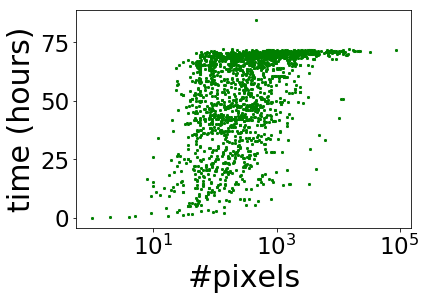

In [423]:
def plot_pixels_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    #ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_times(X, Y, "plot_pixels_vs_times.svg")

In [424]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.18451768],
       [0.18451768, 1.        ]])

In [425]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [426]:
#Time/Pixel

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    t = times_per_project[p]
    pix = pixels_per_project[p]
    
    print("project: ", p, "time: ", t, " pixels: ", pix, " time/pixel: ", r)

project:  1818 time:  123318000  pixels:  12  time/pixel:  10276500.0
project:  1896 time:  230031000  pixels:  23  time/pixel:  10001347.826086957
project:  1533 time:  93927000  pixels:  10  time/pixel:  9392700.0
project:  1854 time:  235563000  pixels:  26  time/pixel:  9060115.384615384
project:  862 time:  209834000  pixels:  24  time/pixel:  8743083.333333334
project:  1408 time:  196881000  pixels:  23  time/pixel:  8560043.47826087
project:  1174 time:  203482000  pixels:  24  time/pixel:  8478416.666666666
project:  1859 time:  205757000  pixels:  25  time/pixel:  8230280.0
project:  1250 time:  240192000  pixels:  30  time/pixel:  8006400.0
project:  1419 time:  150197000  pixels:  20  time/pixel:  7509850.0


In [427]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    t = times_per_project[p]
    pix = pixels_per_project[p]
    
    print("project: ", p, "time: ", t, " pixels: ", pix, " time/pixel: ", r)

project:  1824 time:  0  pixels:  1  time/pixel:  0.0
project:  286 time:  258572000  pixels:  87255  time/pixel:  2963.4061085324624
project:  1692 time:  255648000  pixels:  32920  time/pixel:  7765.735115431348
project:  998 time:  255926000  pixels:  22926  time/pixel:  11163.133560150049
project:  75 time:  255926000  pixels:  21406  time/pixel:  11955.806783144913
project:  1870 time:  255926000  pixels:  21401  time/pixel:  11958.600065417504
project:  61 time:  257283000  pixels:  18669  time/pixel:  13781.295195243452
project:  46 time:  256272000  pixels:  18075  time/pixel:  14178.257261410788
project:  360 time:  258260000  pixels:  17707  time/pixel:  14585.192296831761
project:  1169 time:  153705000  pixels:  10362  time/pixel:  14833.5263462652


In [428]:
#Users vs. entropy per project

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    usr = users_per_project[p]
    ent = entropy_per_project[p]
    
    Y[i] = ent
    X[i] = usr
    
    ratios[p] = ent / usr
    
    i = i + 1

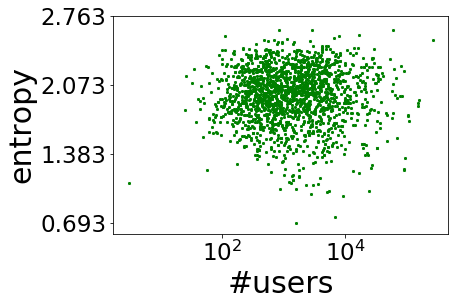

In [429]:
def plot_users_vs_entropy(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_entropy(X, Y, "plot_users_vs_entropy.svg")

In [430]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.01457834],
       [-0.01457834,  1.        ]])

In [431]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [432]:
#Entropy/User

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    ent = entropy_per_project[p]
    usr = users_per_project[p]
    
    print("project: ", p, "ent: ", ent, " usr: ", usr, " entropy/user: ", r)

project:  1824 ent:  1.0986122886681096  usr:  3  entropy/user:  0.36620409622270317
project:  1419 ent:  2.1679025503594818  usr:  26  entropy/user:  0.08338086732151853
project:  1520 ent:  1.8216729838184715  usr:  25  entropy/user:  0.07286691935273887
project:  1408 ent:  2.0908155810619586  usr:  32  entropy/user:  0.06533798690818621
project:  1592 ent:  2.23330011555482  usr:  35  entropy/user:  0.06380857473013772
project:  1401 ent:  1.9304562912741823  usr:  41  entropy/user:  0.047084299787175175
project:  1594 ent:  2.0696308128546264  usr:  45  entropy/user:  0.04599179584121392
project:  1823 ent:  1.7075036453641854  usr:  38  entropy/user:  0.04493430645695225
project:  1110 ent:  1.9152215967871429  usr:  43  entropy/user:  0.044540037134584716
project:  1681 ent:  1.8322107988038823  usr:  44  entropy/user:  0.04164115451827005


In [433]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    ent = entropy_per_project[p]
    usr = users_per_project[p]
    
    print("project: ", p, "ent: ", ent, " usr: ", usr, " entropy/user: ", r)

project:  286 ent:  2.5201075806834554  usr:  266766  entropy/user:  9.446884463100453e-06
project:  1122 ent:  1.9258022777284207  usr:  158121  entropy/user:  1.2179294829456054e-05
project:  1169 ent:  1.8637929076111952  usr:  150274  entropy/user:  1.2402630578883874e-05
project:  42 ent:  1.8934406184632742  usr:  151978  entropy/user:  1.2458649399671494e-05
project:  75 ent:  1.2235034441598396  usr:  88851  entropy/user:  1.3770283330067636e-05
project:  1870 ent:  1.238122435906646  usr:  89266  entropy/user:  1.38700337856143e-05
project:  998 ent:  1.3441048998717267  usr:  93146  entropy/user:  1.4430087173595502e-05
project:  95 ent:  1.7155538740639518  usr:  107561  entropy/user:  1.5949590223816733e-05
project:  1066 ent:  1.7716695512363754  usr:  106865  entropy/user:  1.65785762526213e-05
project:  67 ent:  1.7670523616531872  usr:  105913  entropy/user:  1.6683998769302986e-05


In [435]:
#Users vs. time per project

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    usr = users_per_project[p]
    t = times_per_project[p] / (1000 * 60 * 60)
    
    Y[i] = t
    X[i] = usr
    
    ratios[p] = t / usr
    
    i = i + 1

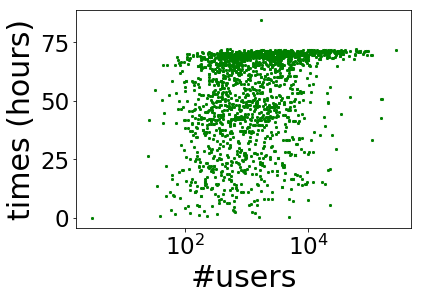

In [436]:
def plot_users_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    #ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_times(X, Y, "plot_users_vs_times.svg")

In [437]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.14488014],
       [0.14488014, 1.        ]])

In [440]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [441]:
#Time/User

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    t = times_per_project[p]
    usr = users_per_project[p]
    
    print("project: ", p, "time: ", t, " usr: ", usr, " time/user: ", r)

project:  1408 time:  196881000  usr:  32  time/user:  1.7090364583333333
project:  1419 time:  150197000  usr:  26  time/user:  1.6046688034188035
project:  1110 time:  234290000  usr:  43  time/user:  1.513501291989664
project:  1170 time:  234290000  usr:  51  time/user:  1.2760893246187361
project:  1401 time:  180923000  usr:  41  time/user:  1.2257655826558265
project:  1520 time:  95264000  usr:  25  time/user:  1.058488888888889
project:  1594 time:  161279000  usr:  45  time/user:  0.9955493827160494
project:  862 time:  209834000  usr:  60  time/user:  0.9714537037037037
project:  1901 time:  235272000  usr:  68  time/user:  0.9610784313725491
project:  1558 time:  246893000  usr:  72  time/user:  0.9525192901234569


In [443]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    t = times_per_project[p]
    usr = users_per_project[p]
    
    print("project: ", p, "time: ", t, " usr: ", usr, " time/user: ", r)

project:  1824 time:  0  usr:  3  time/user:  0.0
project:  1493 time:  1835000  usr:  4849  time/user:  0.00010511903943539331
project:  1383 time:  1105000  usr:  1589  time/user:  0.00019316830990839803
project:  1100 time:  18906000  usr:  22847  time/user:  0.00022986241811470508
project:  286 time:  258572000  usr:  266766  time/user:  0.000269245539369918
project:  1169 time:  153705000  usr:  150274  time/user:  0.0002841198965445342
project:  95 time:  119708000  usr:  107561  time/user:  0.0003091475741413916
project:  1122 time:  182755000  usr:  158121  time/user:  0.00032105335646610996
project:  42 time:  182755000  usr:  151978  time/user:  0.0003340304371539155
project:  1066 time:  250827000  usr:  106865  time/user:  0.0006519830315507104


In [444]:
#Time vs. entropy per project

X = np.zeros(len(updates_per_project))
Y = np.zeros(len(updates_per_project))
ratios = {}

i = 0
for p in updates_per_project.keys():
    ent = entropy_per_project[p]
    t = times_per_project[p] / (1000 * 60 * 60)
    
    Y[i] = ent
    X[i] = t
    
    if t > 0:
        ratios[p] = ent / t
    
    i = i + 1

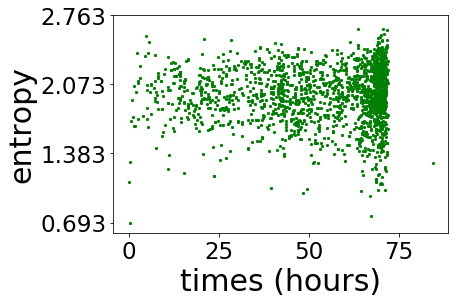

In [445]:
def plot_entropy_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('entropy', fontsize=30)
    ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    #ax.set_xticks(np.arange(0, 2001, 500))
    #ax.set_ylim(0,90)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_entropy_vs_times(X, Y, "plot_entropy_vs_times.svg")

In [447]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.02066956],
       [0.02066956, 1.        ]])

In [448]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [449]:
#Entropy/Time

for i in range(10):
    p = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    t = times_per_project[p]
    ent = entropy_per_project[p]
    
    print("project: ", p, "entropy: ", ent, " time: ", t, " entropy/time: ", r)

project:  1823 entropy:  1.7075036453641854  time:  2390000  entropy/time:  2.5719720181217856
project:  1493 entropy:  1.302178642906814  time:  1835000  entropy/time:  2.554682896165957
project:  1096 entropy:  1.9147854753595217  time:  3008000  entropy/time:  2.2916315529568743
project:  1383 entropy:  0.6928361704898555  time:  1105000  entropy/time:  2.257203813360615
project:  1575 entropy:  2.0585018398090855  time:  5374000  entropy/time:  1.3789740646283417
project:  1341 entropy:  1.7441739406775585  time:  4596000  entropy/time:  1.3661936872147977
project:  1736 entropy:  1.6534958682893786  time:  5142000  entropy/time:  1.1576400478105335
project:  1098 entropy:  2.3886126471492224  time:  8152000  entropy/time:  1.0548338481031894
project:  1640 entropy:  2.0004720210020785  time:  7676000  entropy/time:  0.9382099108399535
project:  1298 entropy:  1.6595475745872037  time:  6835000  entropy/time:  0.8740850429427848


In [450]:
for i in range(1,11):
    p = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    t = times_per_project[p]
    ent = entropy_per_project[p]
    
    print("project: ", p, "entropy: ", ent, " time: ", t, " entropy/time: ", r)

project:  1512 entropy:  0.7545123567706904  time:  242667000  entropy/time:  0.011193299807450067
project:  1791 entropy:  1.0174379097233763  time:  255828000  entropy/time:  0.014317340068343398
project:  1097 entropy:  0.962231222075264  time:  241437000  entropy/time:  0.014347562301846655
project:  1177 entropy:  1.018259757368317  time:  249738000  entropy/time:  0.014678323389015452
project:  230 entropy:  1.2876396873250326  time:  304153000  entropy/time:  0.015240694237341462
project:  1248 entropy:  1.080509250440711  time:  253731000  entropy/time:  0.015330540224042625
project:  1104 entropy:  1.0765558106170405  time:  250841000  entropy/time:  0.015450428431641341
project:  682 entropy:  1.090145665234791  time:  252389000  entropy/time:  0.015549506495311791
project:  856 entropy:  1.010740482668805  time:  232166000  entropy/time:  0.015672689961526223
project:  1899 entropy:  1.0989243837722575  time:  246829000  entropy/time:  0.01602780784097544
